<b style="font-size:26px; line-height:2;">Python scripts to generate a simulated dataset</b>

<b style="font-size:16px; line-height:2;">Yukai You </b>

<b style="font-size:16px; line-height:2;">2024-10-23 </b>

In [1]:
def modelHill(pars, u):# pars=(lambda, 5*n+1, r0/max(R)) here u=inp_Signal/max(inp_signal), n is Uniform (0,1)take 0.001<x[0]=xbasal/max(inp_signal)<=0.999
    #return np.log2((pars[0] + (1-pars[0])/(1+(u/pars[2])**(5*(pars[1])+1)))/(1+pars[0]))
    return np.log2((pars[0] + (1-pars[0])/(1+(u/pars[2])**(5*(pars[1])+1))))


In [2]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

<b style="font-size:20px; line-height:2;">Generate time trajectories</b>

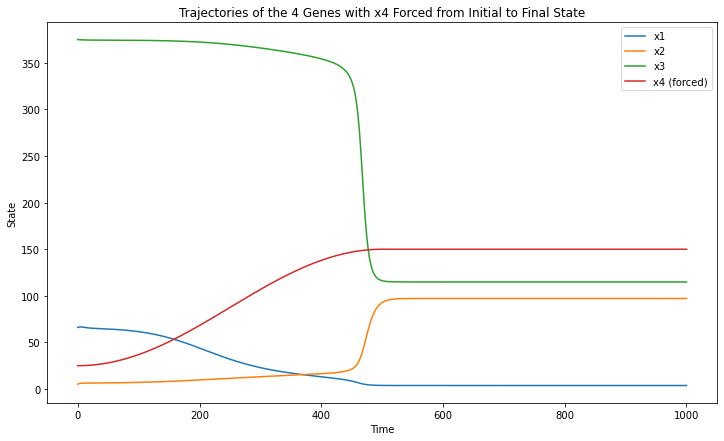

Final x1, x2, and x3: [  3.75782703  97.14386833 114.86603144]


In [3]:
# Time points where we want to solve the ODE
time = np.linspace(0, 1000, 500)

# Initial and final states for x1, x2, x3, x4
final_state = [3.75782703,  97.14386833 , 114.86603144,    150]  # [x1, x2, x3, x4]
initial_state= [66,  5.2, 375,25] 


# Define x4_t(t) as a smooth function transitioning from initial to final value
def x4_t(t):
    T = time[-1]
    peak_value = final_state[3]  # Adjust this value as needed
    if t <= T / 2:
        # Increase from initial_state[3] to peak_value
        s = (1 - np.cos(np.pi * t / (T / 2))) / 2
        return initial_state[3] + (peak_value - initial_state[3]) * s
    else:
        # Decrease from peak_value to final_state[3]
        s = (1 - np.cos(np.pi * (t - T / 2) / (T / 2))) / 2
        return peak_value + (final_state[3] - peak_value) * s

# Define the ODE system for x1, x2, and x3
def system(state, t, g, lambdas, R, n, k):
    x1, x2, x3 = state
    x4 = x4_t(t)

    # For dx1_dt, x2, x3, and x4 affect x1
    dx1_dt = g[0] * np.prod([
        lambdas[0][1] + (1 - lambdas[0][1]) / (1 + (x2 / R[0][1]) ** n[0][1]),
        lambdas[0][2] + (1 - lambdas[0][2]) / (1 + (x3 / R[0][2]) ** n[0][2]),
        lambdas[0][3] + (1 - lambdas[0][3]) / (1 + (x4 / R[0][3]) ** n[0][3]),
    ]) - k[0] * x1

    # For dx2_dt, x1, x3, and x4 affect x2
    dx2_dt = g[1] * np.prod([
        lambdas[1][0] + (1 - lambdas[1][0]) / (1 + (x1 / R[1][0]) ** n[1][0]),
        lambdas[1][2] + (1 - lambdas[1][2]) / (1 + (x3 / R[1][2]) ** n[1][2]),
        lambdas[1][3] + (1 - lambdas[1][3]) / (1 + (x4 / R[1][3]) ** n[1][3]),
    ]) - k[1] * x2

    # For dx3_dt, x1, x2, and x4 affect x3
    dx3_dt = g[2] * np.prod([
        lambdas[2][0] + (1 - lambdas[2][0]) / (1 + (x1 / R[2][0]) ** n[2][0]),
        lambdas[2][1] + (1 - lambdas[2][1]) / (1 + (x2 / R[2][1]) ** n[2][1]),
        lambdas[2][3] + (1 - lambdas[2][3]) / (1 + (x4 / R[2][3]) ** n[2][3]),
    ]) - k[2] * x3

    return [dx1_dt, dx2_dt, dx3_dt]

# Parameters
g = [1.5, 17.0, 75.0, 20.0]  # Growth rates for x1, x2, x3, x4 (x4 is forced)
k = [0.1, 0.3, 0.2, 0.1]     # Decay rates for x1, x2, x3, x4 (x4 is forced)

# Interaction parameters lambdas, R, and n for a 4x4 system
lambdas = [
    [1,    0.05, 5,    1],   # For x1
    [0.1, 1,    1,    4],   # For x2
    [1,    0.3,  1,    1],   # For x3
    [1,    1,    1,    1]    # For x4 (x4 is forced)
]

R = [
    [1, 10, 10, 5],  # For x1
    [4, 1, 1, 120],    # For x2
    [1, 30, 1, 5],   # For x3
    [5, 5, 5, 1]     # For x4 (x4 is forced)
]

n = [
    [1, 4, 4, 2],  # For x1
    [4, 1, 1, 2],  # For x2
    [1, 4, 1, 2],  # For x3
    [2, 2, 2, 1]   # For x4 (x4 is forced)
]




# Initial conditions for x1, x2, and x3
initial_conditions = [initial_state[0], initial_state[1], initial_state[2]]  # [x1, x2, x3]

# Solve the system of ODEs
solution = odeint(system, initial_conditions, time, args=(g, lambdas, R, n, k))

# Extract x1, x2, and x3 from the solution
x1 = solution[:, 0]
x2 = solution[:, 1]
x3 = solution[:, 2]

# Compute x4_t over time
x4 = np.array([x4_t(ti) for ti in time])

# Plot the results
plt.figure(figsize=(12, 7))
plt.plot(time, x1, label='x1')
plt.plot(time, x2, label='x2')
plt.plot(time, x3, label='x3')
plt.plot(time, x4, label='x4 (forced)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('State')
plt.title('Trajectories of the 4 Genes with x4 Forced from Initial to Final State')
plt.show()

# Print final states
print('Final x1, x2, and x3:', solution[-1])


<b style="font-size:20px; line-height:2;">Save the data </b>

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 50))
scaled_x1 = scaler.fit_transform(np.array(x1).reshape(-1, 1)).flatten()
scaled_x2 = scaler.fit_transform(np.array(x2).reshape(-1, 1)).flatten()
scaled_x3 = scaler.fit_transform(np.array(x3).reshape(-1, 1)).flatten()
scaled_x4 = scaler.fit_transform(np.array(x4).reshape(-1, 1)).flatten()
# Log2 transformation and create DataFrame
df = pd.DataFrame({
    'gene1': np.log2(scaled_x1 + 1),
    'gene2': np.log2(scaled_x2 + 1),
    'gene3': np.log2(scaled_x3 + 1),
    "gene4": np.log2(scaled_x4 + 1),
}, index=time).T

# Display the DataFrame
df

# Save the dataframe to CSV
df.to_csv('testexpression.csv')

<b style="font-size:20px; line-height:2;">Initial network 1<b/>

In [5]:
initialnetwork = pd.DataFrame({
    'Source': ["gene1","gene2","gene2","gene3","gene3","gene4"],
    'Target': ["gene2","gene1","gene3","gene1","gene2","gene2"],
    'Type': [1,1,1,1,1,1]
})

initialnetwork.to_csv('Initial_network.csv', index=False)



<b style="font-size:20px; line-height:2;">Initial network 2<b/>

In [6]:
initialnetwork = pd.DataFrame({
    'Source': ["gene1","gene1","gene2","gene2","gene3","gene3","gene4"],
    'Target': ["gene2","gene3","gene1","gene3","gene1","gene2","gene2"],
    'Type': [1,1,1,1,1,1,1]
})

initialnetwork.to_csv('Initial_network2.csv', index=False)


<b style="font-size:20px; line-height:2;">Pseudotime data<b/>

In [7]:
time_scaled = np.linspace(0, 1, len(time))
df_new = pd.DataFrame({
    'Time': time_scaled,
    'gene1': scaled_x1,
})

# Save the new dataframe to CSV
df_new.to_csv('testdatatime.csv', index=False)